# Imbalanced Classes

In this lab, we are going to explore a case of imbalanced classes. 

Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal' (the factors that actually determine the outcome). This is called overfitting, and results in good results in training and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesn't work well (ever).

In [27]:
# libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

#### First, download the data from this [link](https://www.kaggle.com/ntnu-testimon/paysim1) and read the codebook to understand the type of data you are dealing with. Import the dataset and check its shape.

In [9]:
# your code here
df = pd.read_csv('/Users/yago/Desktop/IHW8/lab-imbalance-master/PS_20174392719_1491204439457_log.csv')

In [14]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [13]:
df.shape

(6362620, 11)

#### What is the distribution of the outcome? 

In [15]:
# your code here
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

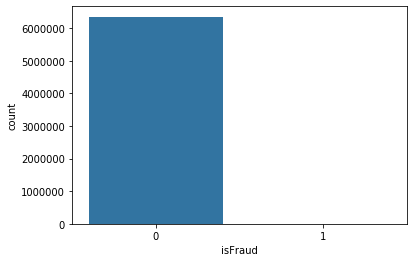

In [16]:
sns.countplot(df['isFraud'])

In [ ]:
#Bernoulli distribution

#### Clean the dataset. Take a look at the data types and nan values. Can you drop any columns? In the next steps you will need to create a logistic regression model. Clean the data so that you can create that model. 

In [17]:
# your code here
df = df.drop(['type', 'nameOrig', 'nameDest'], axis = 1)

#### Split the cleaned dataset intro train and test sets. Read the documentation on sklearn `train_test_split`. Would you use the `stratify` parameter?

In [22]:
# your code here

y = df['isFraud']
x = df.drop(['isFraud','isFlaggedFraud'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# your answer here

#### Run a logisitc regression classifier and evaluate its confusion matrix, precision, recall, f1 score and accuracy.

In [25]:
# your code here
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\yago\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yago\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred = model.predict(X_test)

In [28]:
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

[[1269644     917]
 [   1237     726]]
0.9983073010803726


#### Now pick a model of your choice and evaluate its confusion matrix, precision, recall, f1 score and accuracy.

In [30]:
# your code here
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

#### Which model worked better and how do you know? Is accuracy enough to decide which model is better?

In [ ]:
# your answer here
#working with binary data, logistic regression is better than lineal